In [1]:
!pip3 install pydub
!pip3 install pyAudioAnalysis
!pip install eyed3
!pip install pydub

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
import random

import librosa
import librosa.display
import matplotlib.pyplot as plot
from pydub import AudioSegment

import tensorflow as tf
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO #A
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn import metrics

In [3]:
data_dir = 'wav audios/'

In [4]:
os.listdir(data_dir)

['speaker1', 'speaker2', 'speaker3', 'speaker4', 'speaker5']

In [10]:
data, sr = librosa.load(data_dir + 'arctic_a0001.wav')


# DATA VISUALIZATION

In [11]:
spectogram = np.abs(librosa.stft(data, n_fft=512)**2)


In [12]:
spectogram.shape

(257, 690)

In [13]:
melspec = librosa.feature.melspectrogram(S=spectogram)


In [14]:
melspec.shape

(128, 690)

In [15]:
chroma = librosa.feature.chroma_cqt(y=data,sr=sr)


In [16]:
chroma.shape

(12, 173)

In [17]:
tonnetz = librosa.feature.tonnetz(y=data, sr=sr)


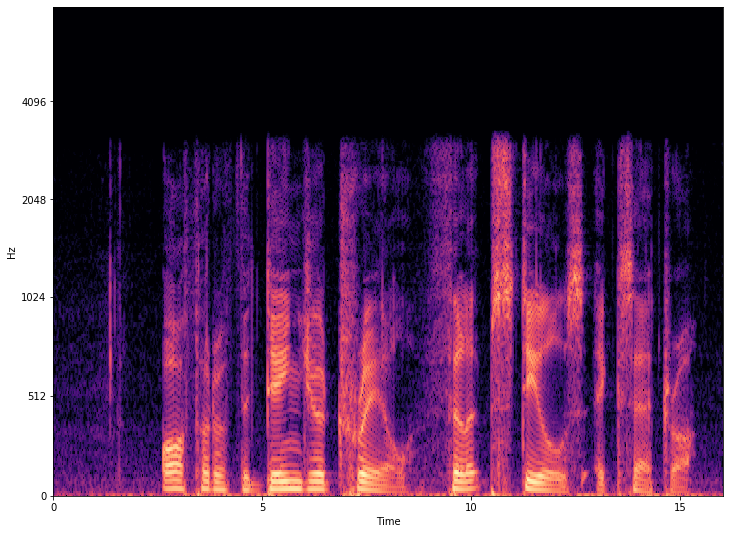

In [18]:
plot.rcParams["figure.figsize"] = [12, 9]
librosa.display.specshow(librosa.power_to_db(spectogram, ref=np.max), y_axis='mel', x_axis='time', fmax=8000)
plot.show()

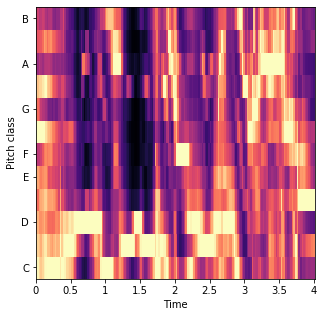

In [19]:
plot.figure(figsize=(5,5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plot.show()

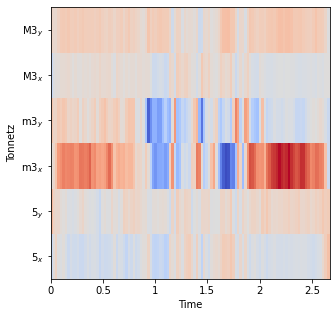

In [ ]:
plot.figure(figsize=(5,5))

librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plot.show()

In [19]:
spect = librosa.feature.melspectrogram(y=data, sr=sr,n_fft=2048, hop_length=512)
spect = librosa.power_to_db(spect, ref=np.max)


In [7]:
def preProcess( fileName ):
    # Extracting wav file data
    [Fs, x] = audioBasicIO.read_audio_file(fileName);

    # If double channel data then take mean
    if( len( x.shape ) > 1 and  x.shape[1] == 2 ):
        x = np.mean( x, axis = 1, keepdims = True )
    else:
        x = x.reshape( x.shape[0], 1 )
    
    # Extract the raw chromagram data, expected dimention is [ m,  ] not [ m, 1 ]
    F, f_names = ShortTermFeatures.feature_extraction(
        x[ :, 0 ], 
        Fs, 0.050*Fs, 
        0.025*Fs
    )
    
    return (f_names, F)

In [8]:
def getChromagram( audioData ):
    # chronograph_1
    temp_data =  audioData[ 21 ].reshape( 1, audioData[ 21 ].shape[0] )
    chronograph = temp_data
    
    # looping through the next 11 stacking them vertically
    for i in range( 22, 33 ):
        temp_data =  audioData[ i ].reshape( 1, audioData[ i ].shape[0] )
        chronograph = np.vstack( [ chronograph,  temp_data ] )
    
    return chronograph

In [9]:
def getNoteFrequency( chromagram ):
    
    # Total number of time frames in the current sample
    numberOfWindows = chromagram.shape[1]
    
    # Taking the note with the highest amplitude
    freqVal = chromagram.argmax( axis = 0 )
    
    # Converting the freqVal vs time to freq count
    histogram, bin = np.histogram( freqVal, bins = 12 ) 
    
    # Normalizing the distribution by the number of time frames
    normalized_hist = histogram.reshape( 1, 12 ).astype( float ) / numberOfWindows
    
    return normalized_hist

In [10]:
def plotHeatmap( chromagraph, smallSample = True ):
    
    notesLabels = [ "G#", "G", "F#", "F", "E", "D#", "D", "C#", "C", "B", "A#", "A" ]
    
    fig, axis = plt.subplots()
    
    if smallSample:
        im = axis.imshow( chromagram[ :, 0 : 25 ], cmap = "YlGn" )
    else:
        im = axis.imshow( chromagram )
        
    cbar = axis.figure.colorbar(im, ax = axis,  cmap = "YlGn")
    cbar.ax.set_ylabel("Amplitude", rotation=-90, va="bottom")
    
    axis.set_yticks( np.arange( len(notesLabels) ) )
    axis.set_yticklabels(notesLabels)
    
    axis.set_title( "chromagram" )
    
    fig.tight_layout()
    _ = plt.show()

In [11]:
def noteFrequencyPlot( noteFrequency, smallSample = True ):
    
    fig, axis = plt.subplots(1, 1, sharey=True )
    
    axis.plot( np.arange( 1, 13 ), noteFrequency[0, :] )
    
    _ = plt.show()

In [11]:
feature_name, features = preProcess(data_dir + 'arctic_a0001.wav')


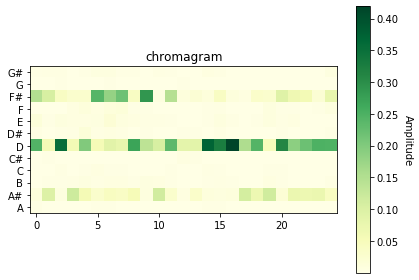

In [12]:
chromagram = getChromagram( features )
plotHeatmap( chromagram )

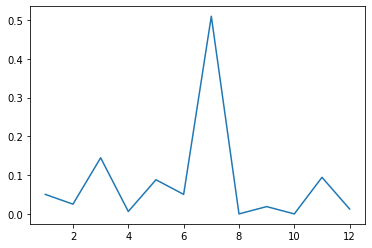

In [13]:
noteFrequency = getNoteFrequency( chromagram )
noteFrequencyPlot( noteFrequency )

# DATA PROCESSING

In [12]:
# !mkdir overlap

In [13]:
sp1 = os.listdir(data_dir+ '/speaker1')
sp2 = os.listdir(data_dir+ '/speaker2')
sp3 = os.listdir(data_dir+ '/speaker3')
sp4 = os.listdir(data_dir+ '/speaker4')
sp5 = os.listdir(data_dir+ '/speaker5')



In [14]:
random.shuffle(sp1)
random.shuffle(sp2)


In [15]:
for i in range(0,772):
    sound1 = AudioSegment.from_file(data_dir + 'speaker1/' + sp1[i])
    sound2 = AudioSegment.from_file(data_dir + 'speaker2/' + sp2[i])
    x = sp1[i]
    combined_sounds = sound1 + sound2

  
    combined_sounds.export('overlap/' + x, format='wav')
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
# OVERLAP FOR SPEAKER 1 AND 2

for i in range(300):
    sound1 = AudioSegment.from_file(data_dir + 'speaker1/' + sp1[i])
    sound2 = AudioSegment.from_file(data_dir + 'speaker2/' + sp2[i])
    x = sp2[i]
    combined = sound1.overlay(sound2)
    combined.export('overlap/' + x, format='wav')
    print(i)




  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
# OVERLAP FOR SPEAKER 1 AND 4

for i in range(300):
    sound1 = AudioSegment.from_file(data_dir + 'speaker1/' + sp1[i])
    sound2 = AudioSegment.from_file(data_dir + 'speaker4/' + sp4[i])
    x = sp4[i]
    combined = sound1.overlay(sound2)
    combined.export('overlap/' + x, format='wav')
    print(i)




  


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
fileList = []

def getDataset( filePath, i):
    X = pd.DataFrame(  )
    
    columns=[ "G#", "G", "F#", "F", "E", "D#", "D", "C#", "C", "B", "A#", "A" ]
    
    for root, dirs, filenames in os.walk( filePath ):
        for file in filenames:
            fileList.append( file )
            feature_name, features = preProcess(filePath + file )
            chromagram = getChromagram( features )
            noteFrequency = getNoteFrequency( chromagram )
            x_new =  pd.Series(noteFrequency[ 0, : ])
            X = pd.concat( [ X, x_new ], axis = 1 )
            print(i)
            i+=1
            
        
    data = X.T.copy()
    data.columns = columns
    data.index = [ i for i in range( 0, data.shape[ 0 ] ) ]
    

            
    return data

In [18]:
data = getDataset( "overlap/",0 )


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [19]:
data['label'] = 1

In [20]:
data

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A,label
0,0.040752,0.015674,0.175549,0.018809,0.050157,0.037618,0.517241,0.015674,0.025078,0.009404,0.084639,0.009404,1
1,0.055710,0.008357,0.192201,0.016713,0.064067,0.027855,0.520891,0.002786,0.019499,0.030641,0.052925,0.008357,1
2,0.022284,0.005571,0.233983,0.030641,0.094708,0.016713,0.490251,0.008357,0.002786,0.022284,0.069638,0.002786,1
3,0.035842,0.000000,0.222222,0.046595,0.078853,0.010753,0.537634,0.007168,0.000000,0.007168,0.043011,0.010753,1
4,0.025048,0.011561,0.134875,0.032755,0.036609,0.032755,0.635838,0.011561,0.009634,0.019268,0.036609,0.013487,1
5,0.034483,0.012539,0.213166,0.059561,0.087774,0.031348,0.388715,0.021944,0.015674,0.021944,0.103448,0.009404,1
6,0.059226,0.025057,0.218679,0.045558,0.095672,0.036446,0.355353,0.018223,0.018223,0.022779,0.093394,0.011390,1
7,0.030075,0.007519,0.215539,0.042607,0.070175,0.022556,0.488722,0.005013,0.007519,0.015038,0.085213,0.010025,1
8,0.047022,0.012539,0.178683,0.015674,0.034483,0.006270,0.539185,0.021944,0.006270,0.037618,0.090909,0.009404,1
9,0.050157,0.012539,0.144201,0.037618,0.094044,0.021944,0.529781,0.000000,0.000000,0.025078,0.078370,0.006270,1


In [1]:
# !mkdir single

In [ ]:
# import shutil

# shutil.rmtree('/content/single')

# FEATURE EXTRACTION

In [21]:
fileList = []

def getDataset( filePath,i ):
    X = pd.DataFrame(  )
    
    columns=[ "G#", "G", "F#", "F", "E", "D#", "D", "C#", "C", "B", "A#", "A" ]
    
    for root, dirs, filenames in os.walk( filePath ):
        for file in filenames:
            fileList.append( file )
            feature_name, features = preProcess(filePath + file )
            chromagram = getChromagram( features )
            noteFrequency = getNoteFrequency( chromagram )
            x_new =  pd.Series(noteFrequency[ 0, : ])
            X = pd.concat( [ X, x_new ], axis = 1 )
            print(i)
            i+=1
        
    data = X.T.copy()
    data.columns = columns
    data.index = [ i for i in range( 0, data.shape[ 0 ] ) ]
            
    return data

In [22]:
data_single = getDataset("single/",0)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
data_single

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A
0,0.025157,0.018868,0.169811,0.018868,0.125786,0.044025,0.471698,0.000000,0.000000,0.012579,0.100629,0.012579
1,0.058824,0.243697,0.033613,0.075630,0.008403,0.000000,0.394958,0.050420,0.000000,0.025210,0.092437,0.016807
2,0.050314,0.000000,0.138365,0.018868,0.088050,0.025157,0.553459,0.012579,0.000000,0.025157,0.075472,0.012579
3,0.016807,0.008403,0.176471,0.058824,0.126050,0.042017,0.403361,0.025210,0.008403,0.016807,0.084034,0.033613
4,0.018868,0.138365,0.025157,0.000000,0.088050,0.069182,0.503145,0.000000,0.018868,0.037736,0.025157,0.075472
5,0.025157,0.006289,0.113208,0.037736,0.113208,0.025157,0.559748,0.000000,0.000000,0.012579,0.094340,0.012579
6,0.084034,0.016807,0.134454,0.025210,0.067227,0.042017,0.504202,0.000000,0.000000,0.016807,0.092437,0.016807
7,0.040201,0.010050,0.180905,0.030151,0.080402,0.040201,0.507538,0.010050,0.000000,0.030151,0.035176,0.035176
8,0.025157,0.006289,0.144654,0.012579,0.157233,0.000000,0.037736,0.459119,0.000000,0.025157,0.012579,0.119497
9,0.050314,0.006289,0.144654,0.044025,0.119497,0.044025,0.459119,0.012579,0.000000,0.006289,0.094340,0.018868


In [25]:
data_single['label'] = 0

In [26]:
data_single.head()

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A,label
0,0.025157,0.018868,0.169811,0.018868,0.125786,0.044025,0.471698,0.000000,0.000000,0.012579,0.100629,0.012579,0
1,0.058824,0.243697,0.033613,0.075630,0.008403,0.000000,0.394958,0.050420,0.000000,0.025210,0.092437,0.016807,0
2,0.050314,0.000000,0.138365,0.018868,0.088050,0.025157,0.553459,0.012579,0.000000,0.025157,0.075472,0.012579,0
3,0.016807,0.008403,0.176471,0.058824,0.126050,0.042017,0.403361,0.025210,0.008403,0.016807,0.084034,0.033613,0
4,0.018868,0.138365,0.025157,0.000000,0.088050,0.069182,0.503145,0.000000,0.018868,0.037736,0.025157,0.075472,0


In [27]:
features = ['G#', 'G', 'F#', 'F', 'E' ,'D#', 'D', 'C#', 'C', 'B', 'A#', 'A']

# FEATURE ENGINEERING

In [29]:
x = data_single.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)



In [30]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5','6', '7', '8','9','10'])

In [31]:
single_df = pd.concat([principalDf, data_single[['label']]], axis = 1)


In [32]:
single_df.head()

,1,2,3,4,5,6,7,8,9,10,label
0,-1.524042,-0.821558,0.055890,-0.516719,-0.475171,-0.100098,-0.136353,-0.745164,-0.581243,0.022105,0
1,-1.605967,-0.889009,3.317934,5.329647,0.379278,-1.208063,1.234668,0.541241,-1.463755,0.522756,0
2,-1.425664,-0.487263,0.101254,-0.483599,-0.407904,-0.192488,-0.002532,-0.452259,0.527295,-0.657407,0
3,-0.976574,-0.555762,-0.280830,0.217409,-0.580998,1.059094,-0.420520,-0.329237,-0.456776,-0.154193,0
4,-1.815738,-2.312113,2.354068,1.382785,1.770748,-0.732101,0.832354,0.629690,0.297788,0.668320,0


In [33]:
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)






In [34]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5','6', '7', '8','9','10'])

In [35]:
overlap_df = pd.concat([principalDf, data[['label']]], axis = 1)


In [36]:
overlap_df.dropna(inplace=True)

In [37]:
final_df = pd.concat([single_df, overlap_df])

In [38]:
final_df = final_df.reset_index()

In [39]:
final_df.drop('index', inplace=True,axis=1)

In [40]:
len(final_df)

1887

In [41]:
final_df = final_df.sample(frac = 1) 


In [43]:
X = final_df.drop('label', axis=1)
y = final_df['label']



In [44]:
y.shape

(1887,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
y.shape

(1887,)

In [49]:
def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.2)

# MODELING

In [50]:
model = Sequential()

model.add(Dense(128, input_shape=(10,)))
model.add(Activation(my_leaky_relu))

model.add(Dense(64))
model.add(Activation(my_leaky_relu))

model.add(Dense(32))
model.add(Activation(my_leaky_relu))

model.add(Dense(16))
model.add(Activation(my_leaky_relu))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1408      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

# TRAINING

In [52]:
model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_test, y_test))


Train on 1264 samples, validate on 623 samples
Epoch 1/10
1264/1264 [==============================] - ETA: 25s - loss: 0.6755 - accuracy: 0.593 - ETA: 0s - loss: 0.6759 - accuracy: 0.568 - 1s 600us/step - loss: 0.6612 - accuracy: 0.6092 - val_loss: 0.6191 - val_accuracy: 0.7111
Epoch 2/10
1264/1264 [==============================] - ETA: 0s - loss: 0.6071 - accuracy: 0.75 - ETA: 0s - loss: 0.5665 - accuracy: 0.73 - 0s 58us/step - loss: 0.5633 - accuracy: 0.7334 - val_loss: 0.4967 - val_accuracy: 0.7881
Epoch 3/10
1264/1264 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.87 - ETA: 0s - loss: 0.4307 - accuracy: 0.84 - 0s 63us/step - loss: 0.4263 - accuracy: 0.8402 - val_loss: 0.3665 - val_accuracy: 0.8539
Epoch 4/10
1264/1264 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.87 - ETA: 0s - loss: 0.3236 - accuracy: 0.88 - 0s 66us/step - loss: 0.3148 - accuracy: 0.8837 - val_loss: 0.2869 - val_accuracy: 0.8860
Epoch 5/10
1264/1264 [===========

In [53]:
losess = pd.DataFrame(model.history.history)

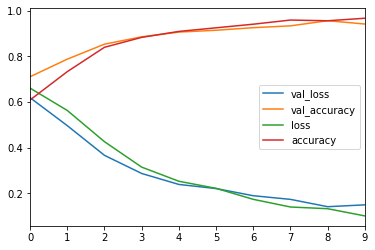

In [54]:
losess.plot()

# TESTING

In [55]:
test = getDataset("single_test/",0)


0
1
2
3
4
5
6
7
8
9
10


In [56]:
test

,G#,G,F#,F,E,D#,D,C#,C,B,A#,A
0,0.042254,0.000000,0.394366,0.035211,0.077465,0.014085,0.265258,0.000000,0.000000,0.014085,0.154930,0.002347
1,0.133803,0.000000,0.380282,0.014085,0.086854,0.000000,0.021127,0.225352,0.000000,0.007042,0.021127,0.110329
2,0.099768,0.000000,0.338747,0.058005,0.146172,0.000000,0.041763,0.213457,0.000000,0.004640,0.039443,0.058005
3,0.081081,0.000000,0.449631,0.049140,0.127764,0.014742,0.159705,0.000000,0.002457,0.019656,0.088452,0.007371
4,0.069606,0.002320,0.422274,0.044084,0.102088,0.000000,0.037123,0.162413,0.000000,0.004640,0.023202,0.132251
5,0.077273,0.009091,0.481818,0.075000,0.140909,0.000000,0.011364,0.086364,0.000000,0.002273,0.015909,0.100000
6,0.080000,0.000000,0.351111,0.055556,0.140000,0.022222,0.184444,0.000000,0.002222,0.022222,0.140000,0.002222
7,0.069606,0.000000,0.424594,0.025522,0.097448,0.000000,0.011601,0.208817,0.000000,0.013921,0.032483,0.116009
8,0.104444,0.000000,0.491111,0.042222,0.051111,0.000000,0.017778,0.171111,0.004444,0.008889,0.026667,0.082222
9,0.085288,0.006397,0.275053,0.066098,0.144989,0.051173,0.155650,0.000000,0.004264,0.036247,0.166311,0.008529


In [57]:
features = ['G#', 'G', 'F#', 'F', 'E' ,'D#', 'D', 'C#', 'C', 'B', 'A#', 'A']

In [58]:
x = test.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)


In [59]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1', '2', '3', '4', '5','6', '7', '8','9','10'])

In [60]:
len(principalDf)

11

In [61]:
model.predict_classes(principalDf)

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [84]:
b = os.listdir('test')